Consider the data present in the Student's Performance dataset file. <br>
Following is the attribute related information:<br><br>

Hours Studied:
Number of hours an individual has studied (numeric)<br>

Previous Scores:
Scores obtained by the individual in previous evaluations/tests (numeric)<br>

Extracurricular Activities:
Participation in extracurricular activities, categorized as yes or no (categorical).<br>

Sleep Hours:
Average number of hours of sleep the individual gets daily (numeric).<br>

Sample Question Papers Practiced:
The number of sample question papers practiced by the individual (numeric).<br>

Performance Index:
Overall performance score calculated for the individual, based on other factors (numeric). (Target variable for prediction)<br><br>



Problem statement: To predict the Performance Index of an individual based on the features such as Hours Studied, Previous Scores, Participation in Extracurricular Activities, Sleep Hours, and Sample Question Papers Practiced. The goal is to develop a model that can estimate the approximate performance score using these influencing factors.

### **Dataset to determine how various factors affect the Student's Performance**

In [15]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [16]:
#Creating a dataframe named "data" from the given datafile and printing it's head
data = pd.read_csv(r"C:\Users\Sana\Downloads\Student_Performance (1).csv")


In [17]:
#Display first five rows of the dataframe
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### **Perform Exploratory Data Analysis**

In [18]:
# Check shape of the Dataframe
data.shape

(10000, 6)

In [19]:
# Quick Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [20]:
#Descriptive statistics
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### **Check if there are missing values. If yes, handle them.**

In [21]:
data.isnull().sum() #There are no missing values in the dataset

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [22]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [23]:
# Check For Duplicates
data.duplicated().any()

True

In [24]:
#Drop duplicates
data.drop_duplicates(keep='first',inplace=True)

In [25]:
#Rechecking to confirm that the duplicates has been dropped
data.duplicated().any()

False

In [26]:
#after removing duplicates the shape of the dataset (dropped 127 records)
data.shape 

(9873, 6)

### **Convering categorical variables to numerical**

In [31]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [32]:
data['Extracurricular Activities']=data['Extracurricular Activities'].map({'Yes':1,'No':0})

In [33]:
data.head() #converted Extracurricular activities categorical column to numeric having values 1 for Yes and 0 for No

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


### **Check for Assumption 1- There should be no outliers in the data.**<br>

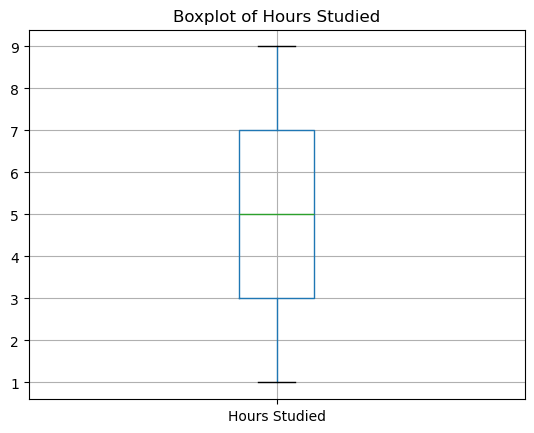

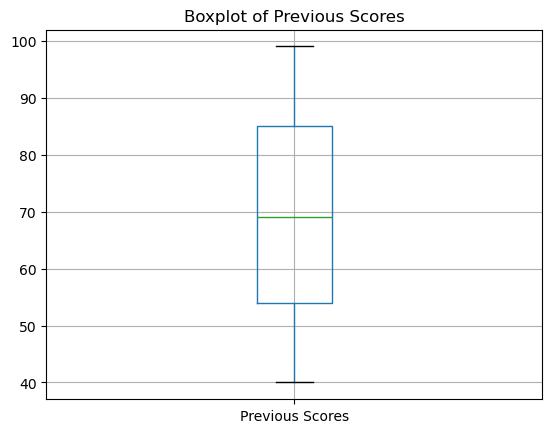

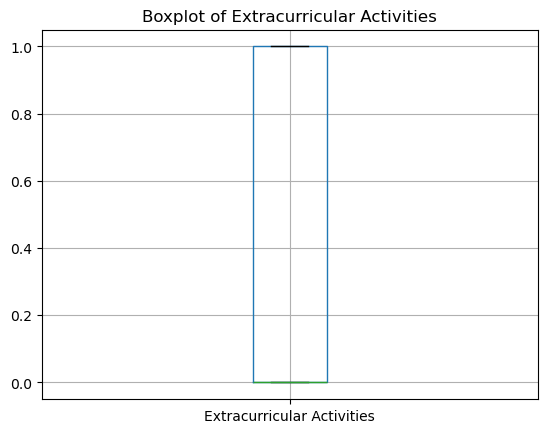

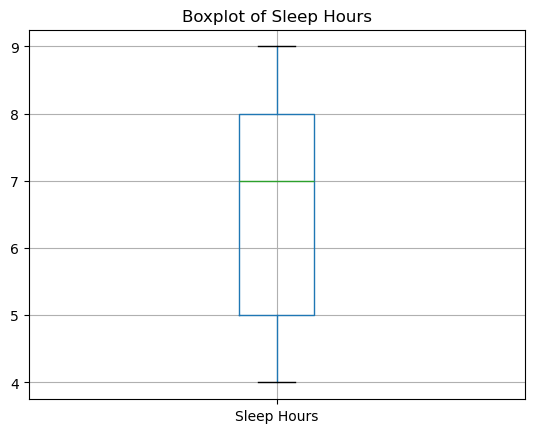

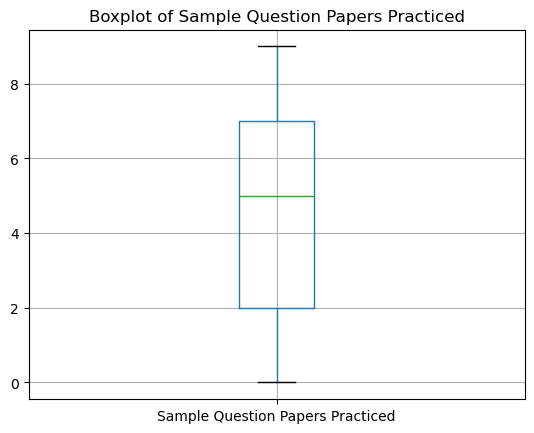

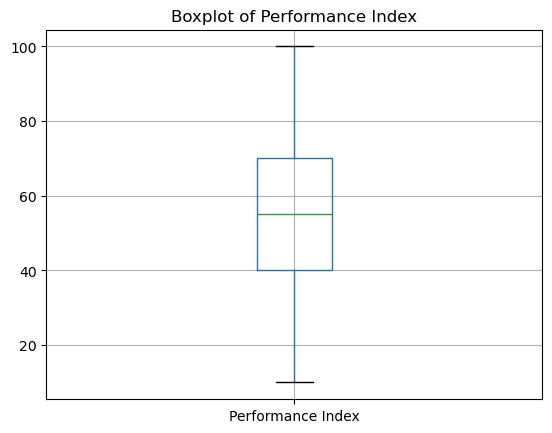

In [34]:
for i in data.columns:
    # Check if the column's data type is either int64 or float64
    if data[i].dtype == "int64" or data[i].dtype == "float64":
        # Create a boxplot for the numeric column
        data.boxplot(column=i)
        
        # Show the plot
        plt.title(f'Boxplot of {i}')
        plt.show()

In [ ]:
#There are no outliers in the dataset

### **Check for Assumption 2-Assumption of Linearity**<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

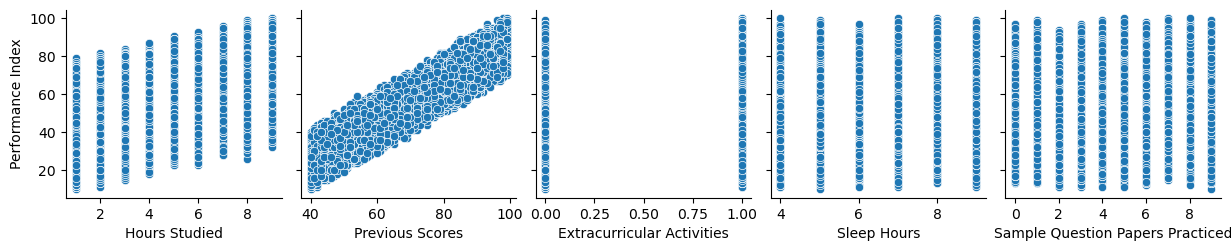

In [35]:
sns.pairplot(data,x_vars=['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
                          'Sleep Hours', 'Sample Question Papers Practiced'],
             y_vars=['Performance Index'],kind='scatter')
plt.show()

In [ ]:
# Previous Scores and Performance Index are having a strong positive correlation 
# Hours Studied and Performance Index having weak positive correlation but as compare to other it is better

### **Create X and Y**

In [39]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [41]:
#X = data.drop('Performance Index', axis=1)
#y = data['Performance Index']
#OR
X= data.iloc[:,0:-1]
Y= data.iloc[:,-1]

In [42]:
print(X.shape) #x is having all rows and 5 column 
print(Y.shape) # y is having all rows and one col that is the D.V col (performance index)

(9873, 5)
(9873,)


### **Check for Assumption 3-Assumption of Normality of D.V (Y)** <br>
Hint: If you find the data is skewed. So log transform the data.

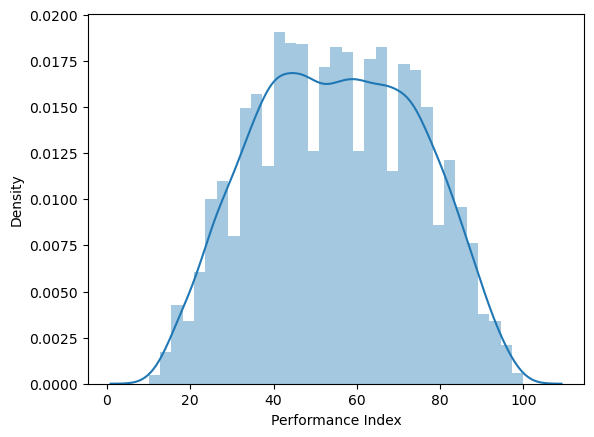

In [44]:
sns.distplot(Y)
plt.show()

In [ ]:
#We can see that the D.V (Y) is approximately normally distributed

**Check for the normality in the X variables. <br>**
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

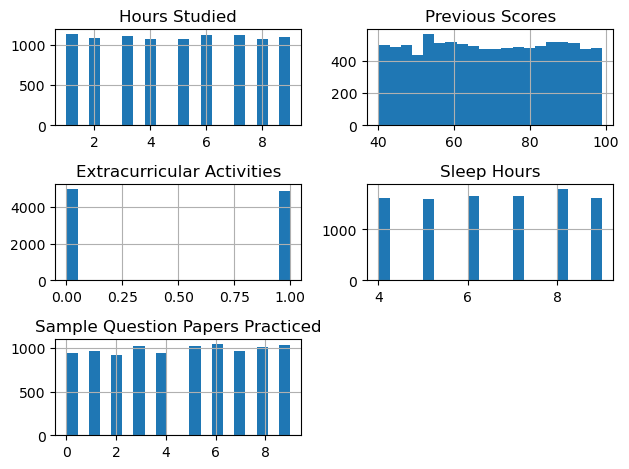

In [47]:
X.hist(bins=20) #divide into 20 bars
plt.tight_layout()
plt.show()

### **Check for Assumption 4-No multicollinearity in the data**<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

In [48]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)

Hours Studied                      -0.003348
Previous Scores                     0.005580
Extracurricular Activities          0.020056
Sleep Hours                        -0.041343
Sample Question Papers Practiced   -0.034888
dtype: float64
Series([], dtype: float64)


In [ ]:
#Values are Between -0.5 and 0.5: Negligibly skewed.

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.010676   
Previous Scores                       -0.010676         1.000000   
Extracurricular Activities             0.004899         0.009534   
Sleep Hours                            0.002131         0.007975   
Sample Question Papers Practiced       0.015740         0.008719   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.004899     0.002131   
Previous Scores                                     0.009534     0.007975   
Extracurricular Activities                          1.000000    -0.024008   
Sleep Hours                                        -0.024008     1.000000   
Sample Question Papers Practiced                    0.013839     0.004907   

                                  Sample Question Papers Practiced  
Hours Studied                                             0

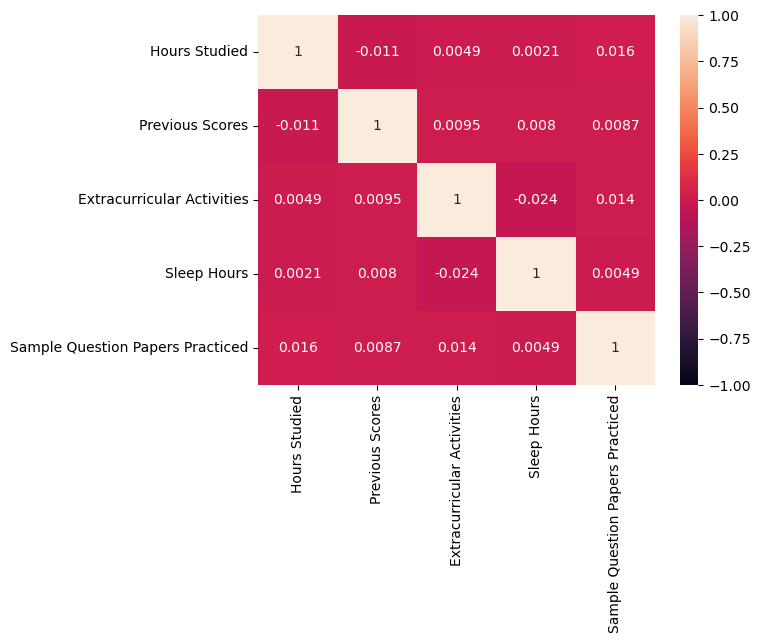

In [49]:
#to check if independent variables (X) are dependent on each other.
#We know as name is I.V. it should not be dependent so thus multicolinearity is a problem
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame() #creating empty d.f
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] #shape returns the no of rows and no of columns
vif_df.round(2)

#Acceptable V.I.F - <5/10

,features,VIF Factor
0,Hours Studied,4.27
1,Previous Scores,10.12
2,Extracurricular Activities,1.93
3,Sleep Hours,9.84
4,Sample Question Papers Practiced,3.35


### **Split the data into train and test.**

In [52]:
from sklearn.model_selection import train_test_split
#module model_selection function train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                   random_state=10)

### **Build a base Linear Regression model using sklearn.**

In [53]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#When model learns it gives us the best fit line and so we get the intercept slope coeffs
#print intercept and coefficients

print(lm.intercept_) 
print(lm.coef_)

-34.03141143389315
[2.85391567 1.01802924 0.59778371 0.48258993 0.18539982]


In [54]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7898, 5)
(7898,)
(1975, 5)
(1975,)


In [55]:
#Create a zipped list of the slope coefficients to understand the equation better.
print(list(zip(X.columns, lm.coef_)))
#these coeffs means one unit change in x var will cause how many unit changes in y 

[('Hours Studied', 2.8539156674413237), ('Previous Scores', 1.0180292430984172), ('Extracurricular Activities', 0.5977837137171533), ('Sleep Hours', 0.48258993096537484), ('Sample Question Papers Practiced', 0.18539982003237876)]


In [57]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)
#will get 1975 values

[75.95961937 55.91089324 71.64929764 ... 19.68061203 49.1175591
 84.48333367]


In [ ]:
#Evaluate the model.

In [58]:
new_df=pd.DataFrame()
new_df=X_test.copy()
new_df["Actual P.I"]=Y_test
new_df["Predicted P.I"]=Y_pred
#resetting the index because we want to see the graph and if we do not reset the index in ascending order the graph will be not reliable and understandable
new_df=new_df.reset_index().drop("index", axis=1)
new_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Actual P.I,Predicted P.I
0,9,78,0,9,3,74.0,75.959619
1,9,59,0,6,7,50.0,55.910893
2,6,84,0,4,6,72.0,71.649298
3,9,43,0,4,4,40.0,38.101046
4,2,54,0,7,0,30.0,30.028129
...,...,...,...,...,...,...,...
1970,9,41,0,7,9,41.0,38.439756
1971,2,54,1,8,6,31.0,32.220901
1972,1,47,1,5,0,19.0,19.680612
1973,4,67,0,5,6,48.0,49.117559


In [102]:
new_df.to_excel("Students Performance Prediction.xlsx",header=True,index=True) 
new_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6848,3,80,0,8,8,59.0
3287,2,87,1,4,6,59.0
1312,1,87,0,5,0,59.0
9254,5,49,0,7,5,36.0
4615,4,51,0,9,6,30.0


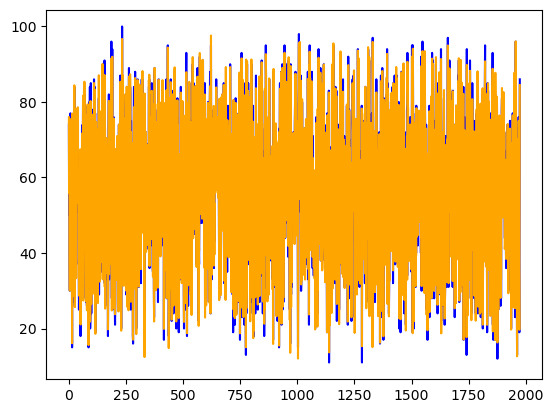

In [59]:
new_df["Actual P.I"].plot(color="blue")
new_df["Predicted P.I"].plot(color="orange")
plt.show()

In [ ]:
#By looking at the graph we can interpret that the model is predicting almost the values similar to the actual values in Y_test

### **Evaluate the linear regression model.**<br>

In [60]:
lm.score(X_train,Y_train)

0.9888956710625104

In [61]:
from sklearn.metrics import r2_score,mean_squared_error 
import numpy as np
 
r2=r2_score(Y_test,Y_pred) #get r2 value it will compare the yact and ypred values get sst and sse and plug it in this formula
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9877782823407963
RMSE: 2.0931884193107995
Adj R-square: 0.9877720891120241


In [62]:
#to know range of Y axis for rmse interpretation 
print(Y_test.min())
print(Y_test.max())

11.0
100.0


### **Perform Ridge and Lasso regression. Evaluate them as well.**<br>

In [63]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)
#print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

-34.0308023650934
[2.85386207 1.01802876 0.59748054 0.48256637 0.18539861]


In [64]:
Y_pred=rid.predict(X_test)

In [65]:
from sklearn.metrics import r2_score,mean_squared_error 
import numpy as np
 
r2=r2_score(Y_test,Y_pred) 
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9877782510576796
RMSE: 2.0931910982065807
Adj R-square: 0.9877720578130549


In [66]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)

#print intercept and coefficients
print(las.intercept_)
print(las.coef_)

-29.99007819309758
[2.70668432 1.01503438 0.         0.13308951 0.0697036 ]


In [67]:
Y_pred = las.predict(X_test)

In [68]:
from sklearn.metrics import r2_score,mean_squared_error 
import numpy as np
 
r2=r2_score(Y_test,Y_pred) 
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9855914848423215
RMSE: 2.272750771528468
Adj R-square: 0.9855841834765783


In [69]:
#Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.
new_df=pd.DataFrame()
new_df = X_train.copy()

new_df["Performance Index"]=Y_train.copy()
new_df.shape


(7898, 6)

In [ ]:
#Build OLS model using statsmodels library. Check the summary to evaluate.
#Hint: No high p-values.

In [70]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [84]:
import statsmodels.formula.api as sm

from patsy import dmatrix

lm_model = sm.ols(
    formula='Q("Performance Index") ~ Q("Hours Studied") + Q("Previous Scores") + Q("Extracurricular Activities") + Q("Sleep Hours") + Q("Sample Question Papers Practiced")',
    data=new_df
).fit()



# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept                               -34.031411
Q("Hours Studied")                        2.853916
Q("Previous Scores")                      1.018029
Q("Extracurricular Activities")           0.597784
Q("Sleep Hours")                          0.482590
Q("Sample Question Papers Practiced")     0.185400
dtype: float64
                              OLS Regression Results                              
Dep. Variable:     Q("Performance Index")   R-squared:                       0.989
Model:                                OLS   Adj. R-squared:                  0.989
Method:                     Least Squares   F-statistic:                 1.406e+05
Date:                    Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                            19:20:34   Log-Likelihood:                -16803.
No. Observations:                    7898   AIC:                         3.362e+04
Df Residuals:                        7892   BIC:                         3.366e+04
Df Model:      

In [86]:
y_pred=lm_model.predict(X_test)

In [87]:
from sklearn.metrics import r2_score,mean_squared_error 
import numpy as np
 
r2=r2_score(Y_test,Y_pred) 
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9855914848423215
RMSE: 2.272750771528468
Adj R-square: 0.9855841834765783


In [88]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='Q("Performance Index") ~ Q("Hours Studied") + Q("Previous Scores") + Q("Sleep Hours") + Q("Sample Question Papers Practiced")',
                  data=new_df).fit()

#print the coefficients
print(lm_model.params)
print(lm_model.summary())
#eliminating the Extracurricular Activities variable did not change the r2 value which means that it did not affected the model in a bad way 

Intercept                               -33.717662
Q("Hours Studied")                        2.854463
Q("Previous Scores")                      1.018053
Q("Sleep Hours")                          0.478061
Q("Sample Question Papers Practiced")     0.186940
dtype: float64
                              OLS Regression Results                              
Dep. Variable:     Q("Performance Index")   R-squared:                       0.989
Model:                                OLS   Adj. R-squared:                  0.989
Method:                     Least Squares   F-statistic:                 1.720e+05
Date:                    Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                            19:42:08   Log-Likelihood:                -16888.
No. Observations:                    7898   AIC:                         3.379e+04
Df Residuals:                        7893   BIC:                         3.382e+04
Df Model:                               4                         

In [89]:
y_pred=lm_model.predict(X_test)

In [90]:
from sklearn.metrics import r2_score,mean_squared_error 
import numpy as np
 
r2=r2_score(Y_test,Y_pred) #get r2 value it will compare the yact and ypred values get sst and sse and plug it in this formula
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9855914848423215
RMSE: 2.272750771528468
Adj R-square: 0.9855841834765783


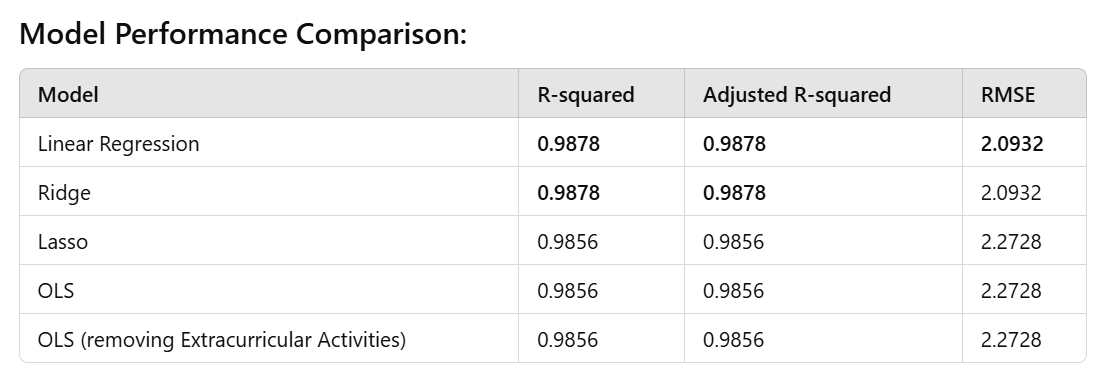

### **CONCLUSION**

# **Linear Regression and Ridge Regression:**

Both models have the highest R-squared (0.9878) and lowest RMSE (2.0932), making them the most accurate.

Their adjusted R-squared values are also the highest, suggesting a well-fitted model.

### **POST MODEL ASSUMPTION**
## **Assumption- There should be no auto-correlation in the data.**

To check for auto-correlation in your data, you can use the Durbin-Watson (D-W) Test. 
    
Interpret the Durbin-Watson Statistic: The D-W statistic ranges between 0 and 4:

2: No auto-correlation (ideal).

< 2: Positive auto-correlation.

> 2: Negative auto-correlation.

0–1.5 or 2.5–4: Significant auto-correlation (not desirable).

#### **Our Durbin-Watson (D-W) value of 1.992 is excellent and indicates that there is no significant auto-correlation in our data.**

## **Assumption: Errors should be random**

checked using Residual v/s Fitted plot--> (graph name)

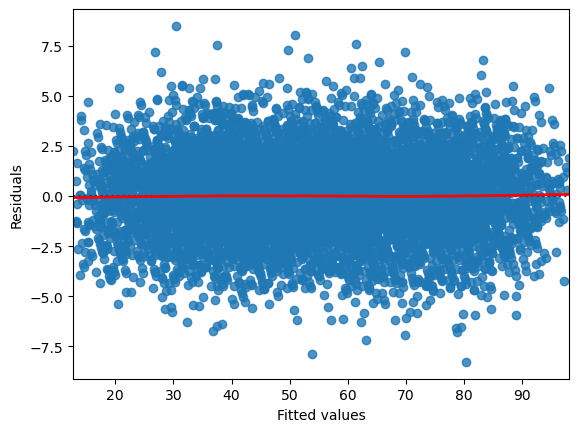

In [97]:
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='Performance Index', data=new_df, lowess=True,line_kws={'color':'red','linewidth':2})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#The residuals are almost evenly distributed

## **Assumption: Errors should follow a approximate normal distribution**
checked using Normal QQ plot

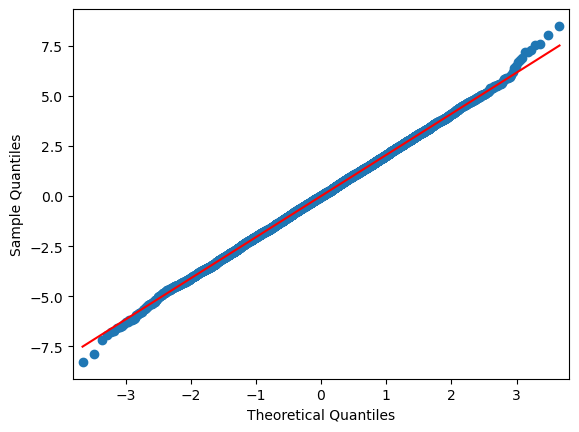

In [98]:
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

#The red diagonal line in the graph indicates normal distribution if majority of the error points fall along the red diagonal line we can conclude that the errors do follow an approximate normal distribution.

## **Assumption: Errors should follow a constant variance-->Homoskedasticity**
checked using Scale location plot

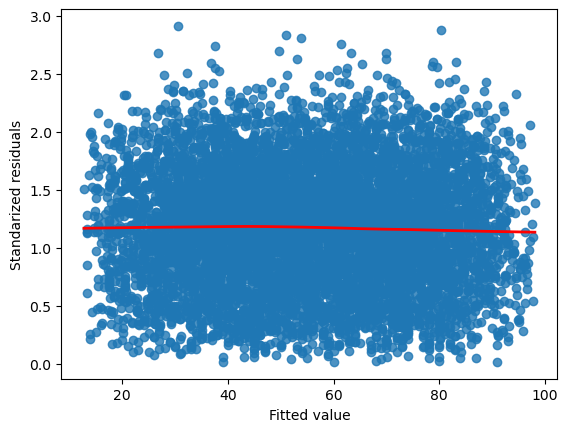

In [100]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True,line_kws={'color':'red','linewidth':2})        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()


The line fitted into these error points should be an approximate horizontal line indicating a constant variance.The line should not show steep angle or a V-shaped structure.